In [1]:
import numpy as np
import pandas as pd
import numpy as np
import os

import math


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
FOLDER = '/Users/daphneliu/2019-2020/Helix Hacks/web-food-covid/'
#load data from csv
def load_data_from_csv(fileName, data_path=FOLDER):
    csv_path = os.path.join(data_path,fileName)
    return pd.read_csv(csv_path, low_memory=False,index_col=0)

#function to save a dataframe to csv
def save_data_to_csv(data,fileName, data_path=FOLDER):
    csv_path = os.path.join(data_path, fileName)
    data.to_csv(csv_path)

In [3]:
data = load_data_from_csv('Food_Supply_kcal_Data.csv')
data.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,2.3012,0.7504,4.5,29.8,0.094302,0.003298,0.065531,0.025473,38928000.0,%
Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,2.8244,2.7508,22.3,6.2,0.194468,0.005849,0.106342,0.082276,2838000.0,%
Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,5.7638,2.0457,26.6,3.9,0.070936,0.002775,0.048288,0.019873,44357000.0,%
Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,4.2741,0.3525,6.8,25,0.003687,0.000169,0.001418,0.002100,32522000.0,%
Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,4.6904,1.2960,19.1,NaN,0.092857,0.003061,0.068367,0.021429,98000.0,%


In [4]:
data.columns

Index(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [5]:
data_complete = data.copy().drop(['Obesity', 'Undernourished', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1)

In [6]:
data_complete.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Confirmed
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,0.1001,0.3252,0.0750,0.0,2.2261,0.1251,45.2476,2.3012,0.7504,0.094302
Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,0.0000,1.2651,0.2501,0.0,3.4422,0.3972,33.9070,2.8244,2.7508,0.194468
Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,0.1195,1.9262,0.1493,0.0,3.9869,0.2240,43.9749,5.7638,2.0457,0.070936
Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,0.0000,12.6239,0.0441,0.0,2.7539,0.0000,45.3184,4.2741,0.3525,0.003687
Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,0.3497,0.8434,0.4937,0.0,5.8218,0.0823,34.6225,4.6904,1.2960,0.092857


In [7]:
data_complete.isnull().sum()

Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Confirmed                   9
dtype: int64

In [8]:
data_complete[data_complete['Confirmed'].isnull()].index.tolist()

['French Polynesia',
 'Kiribati',
 'Korea, North',
 'Myanmar',
 'New Caledonia',
 'Samoa',
 'Solomon Islands',
 'Turkmenistan',
 'Vanuatu']

In [9]:
data_complete.shape

(170, 24)

In [10]:
data_complete = data_complete.drop(['French Polynesia',
 'Kiribati',
 'Korea, North',
 'Myanmar',
 'New Caledonia',
 'Samoa',
 'Solomon Islands',
 'Turkmenistan',
 'Vanuatu'])

In [11]:
data_complete[data_complete['Confirmed'].isnull()].index.tolist()

[]

In [12]:
data_complete.reset_index(drop=True, inplace=True)

In [28]:
np.corrcoef(data['Alcoholic Beverages'], data['Confirmed'])

array([[ 1., nan],
       [nan, nan]])

# Data Exploration

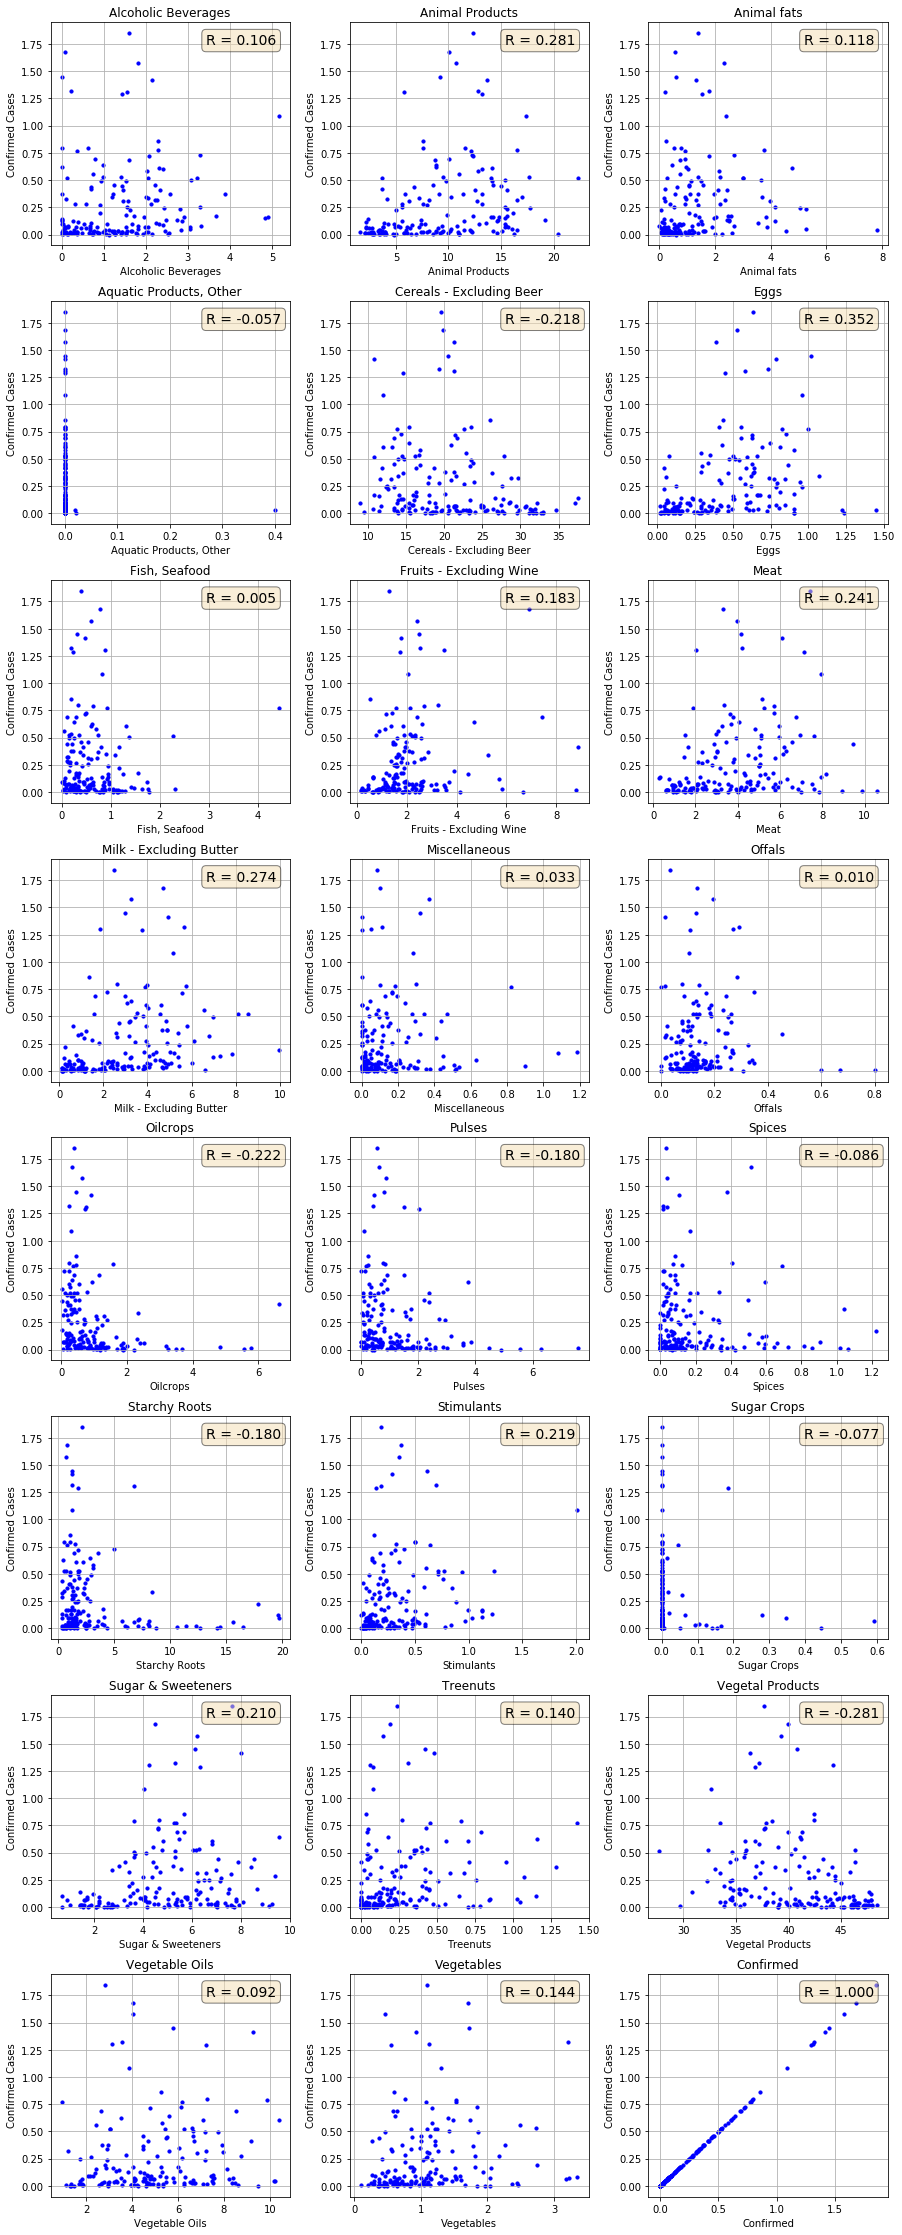

In [34]:
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, figsize=(15,40))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)
coeffs = []

for ax, feature in zip(axes.flat, data_complete.columns):
    ax.scatter(data_complete[feature], data_complete.Confirmed,s=10, c='b', marker="o")
    ax.set_title(feature)
    ax.grid(True)
    ax.set_xlabel(feature)
    ax.set_ylabel('Confirmed Cases')
    corr = np.corrcoef(data_complete[feature], data_complete.Confirmed)
    coeffs.append(corr[0][1])
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.65, 0.95, "R = %.3f"%corr[0][1], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [58]:
def plot_scatter(feature):
    plt.scatter(data_complete[feature], data_complete['Confirmed'])
    plt.xticks(rotation=25)
    plt.title("Relationship between %s and confirmed coronavirus cases"%feature, fontsize=20)
    plt.xlabel("Age", fontsize = 12)
    plt.ylabel("Value", fontsize=12)
    
    m, b = np.polyfit(data_complete[feature], data_complete['Confirmed'], 1)
    plt.plot(data_complete[feature], m*data_complete[feature] + b)
    plt.show()

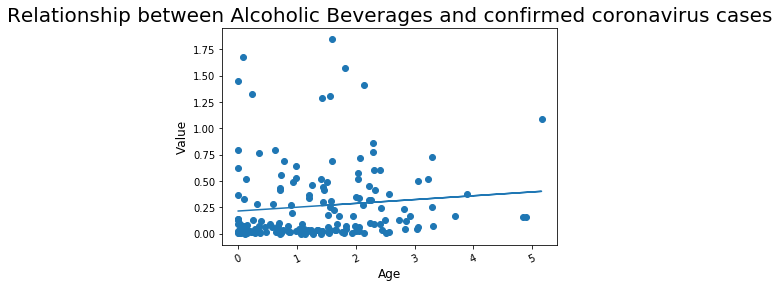

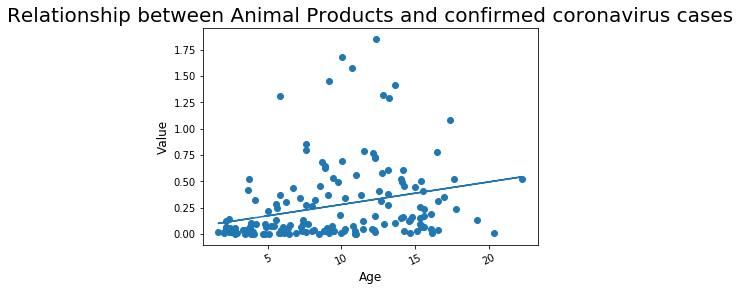

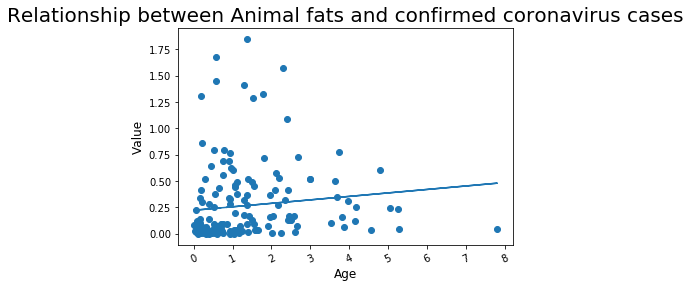

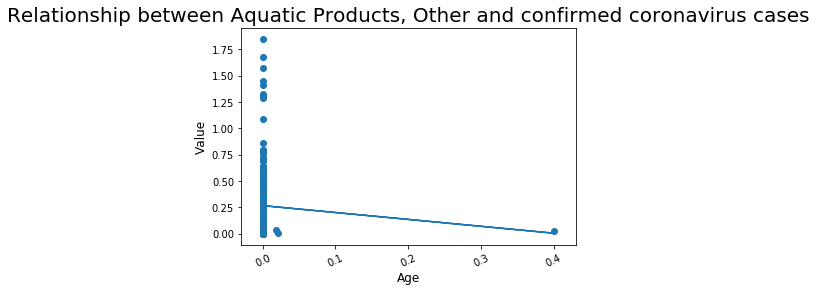

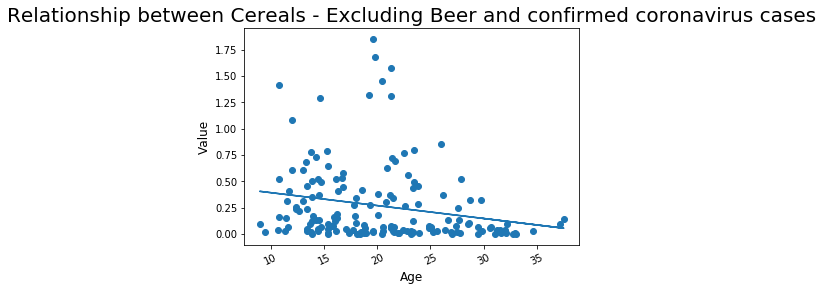

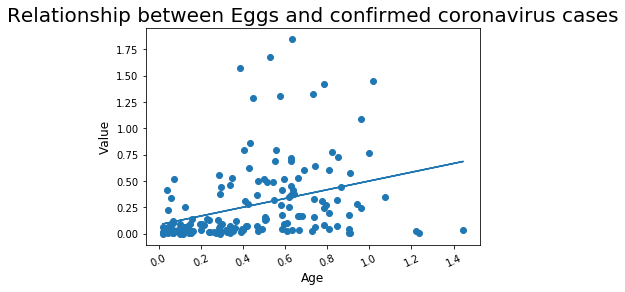

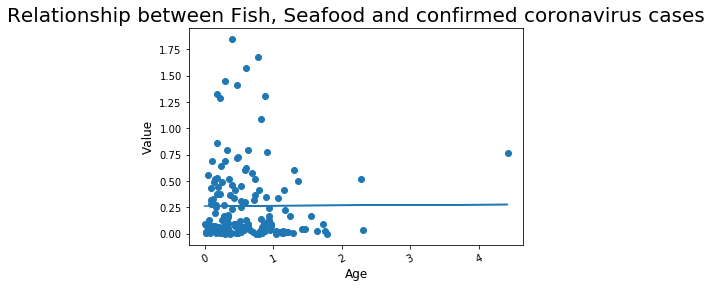

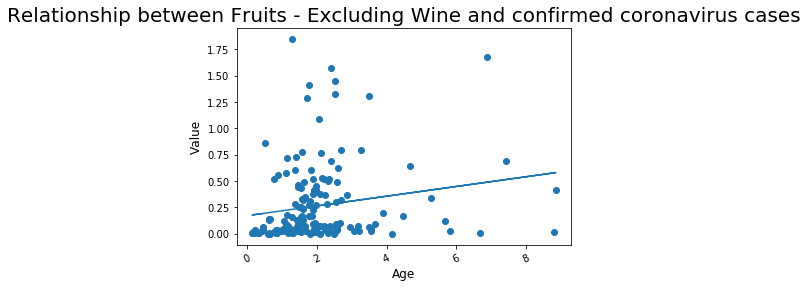

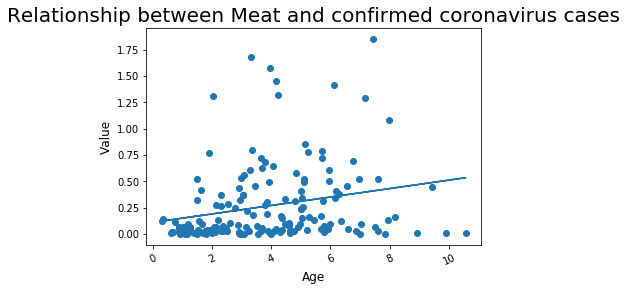

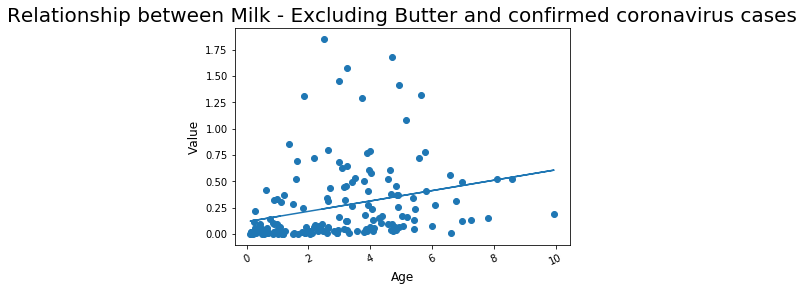

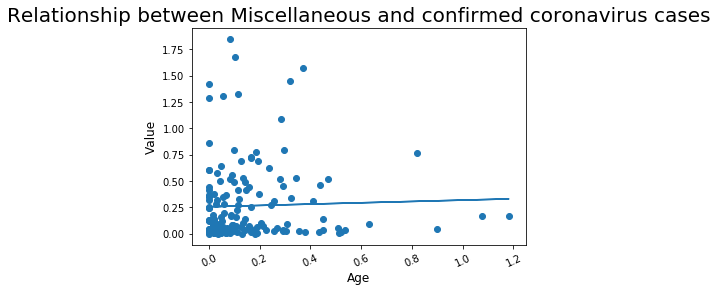

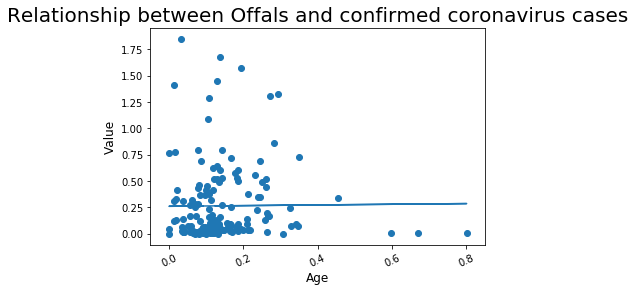

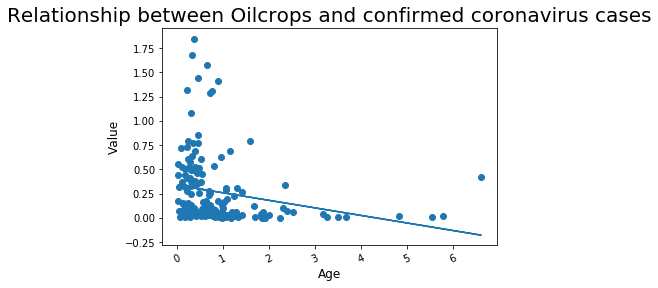

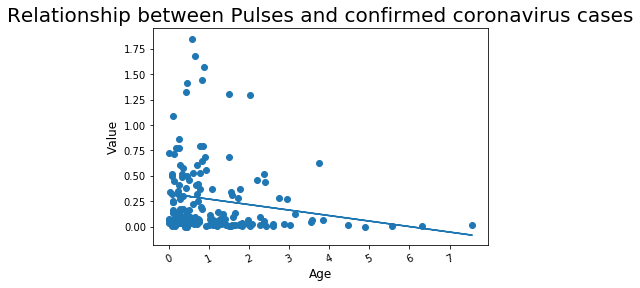

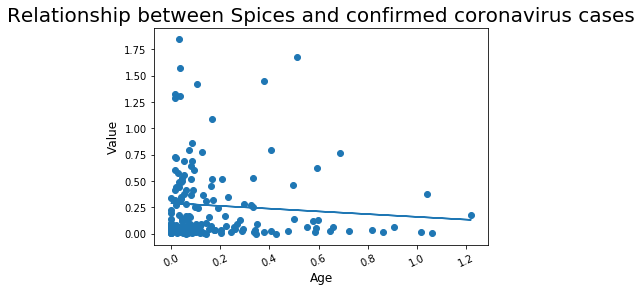

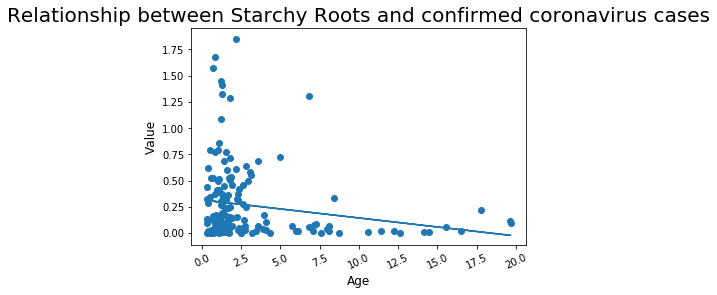

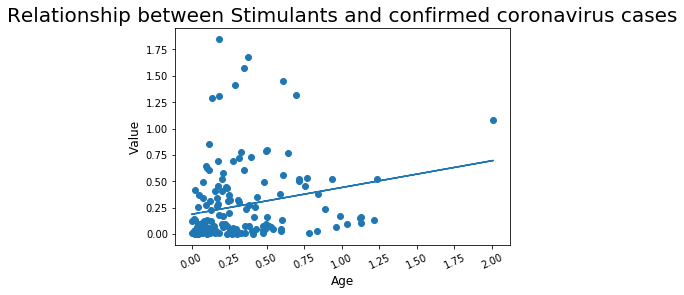

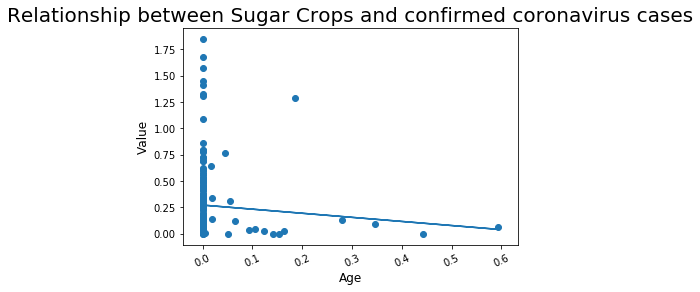

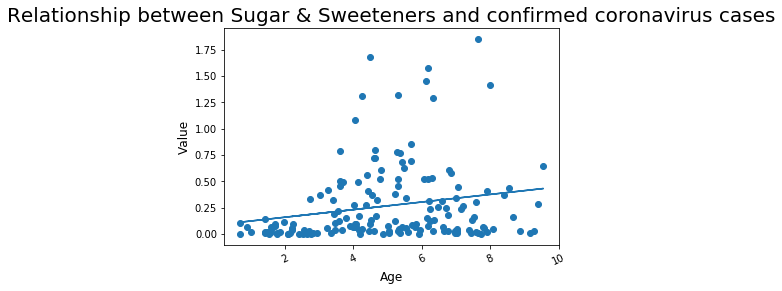

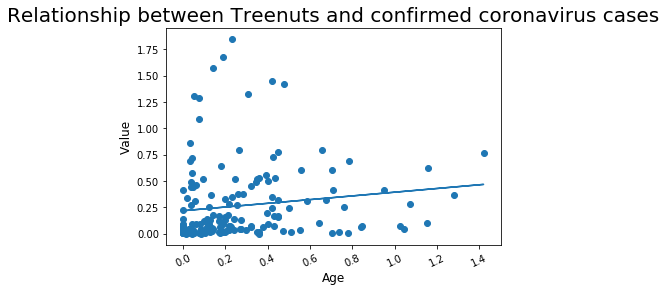

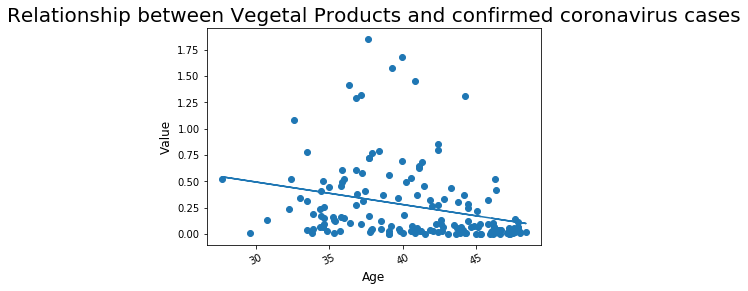

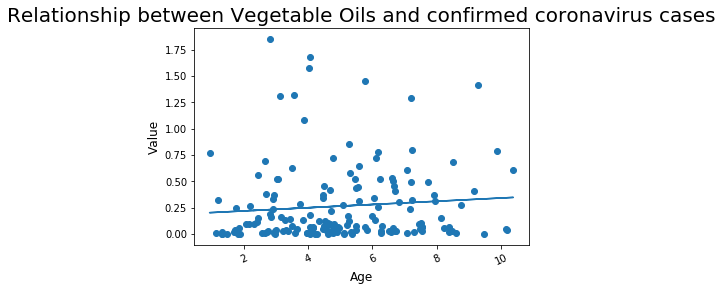

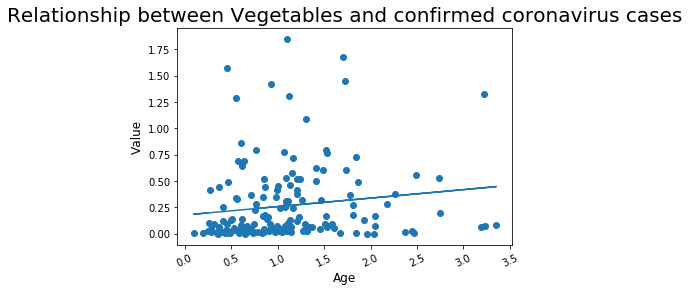

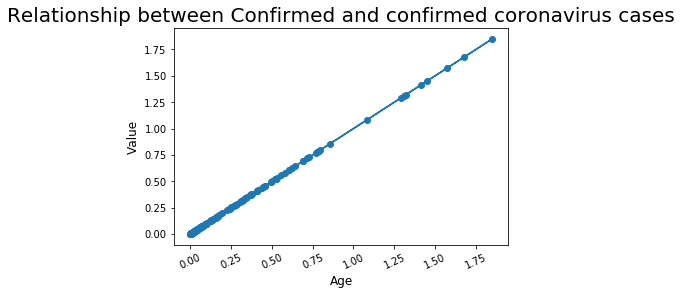

In [59]:
for feature in data_complete.columns:
    plot_scatter(feature)

In [166]:
X = data_complete.copy().drop(['Confirmed'], axis = 1)
X.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables
0,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,0.5003,0.1001,0.3252,0.0750,0.0,2.2261,0.1251,45.2476,2.3012,0.7504
1,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,0.8091,0.0000,1.2651,0.2501,0.0,3.4422,0.3972,33.9070,2.8244,2.7508
2,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,1.0900,0.1195,1.9262,0.1493,0.0,3.9869,0.2240,43.9749,5.7638,2.0457
3,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,1.4981,0.0000,12.6239,0.0441,0.0,2.7539,0.0000,45.3184,4.2741,0.3525
4,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,0.4526,0.3497,0.8434,0.4937,0.0,5.8218,0.0823,34.6225,4.6904,1.2960


In [167]:
y = pd.DataFrame(data_complete['Confirmed'])
y.head()

,Confirmed
0,0.094302
1,0.194468
2,0.070936
3,0.003687
4,0.092857


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)

# Linear Regression

In [169]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
train_r2 = lin_reg.score(X_train, y_train)
test_r2 = lin_reg.score(X_test, y_test)
y_pred = lin_reg.predict(X_test)

train_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
test_mse = mean_squared_error(y_test, lin_reg.predict(X_test))



print('Training mean squared error: %.2f' % train_mse)
print('Testing mean squared error: %.2f' % test_mse)
print(' ')
#print('Training correlation coefficient, R: %.3f' % math.sqrt(train_r2))
#print('Testing correlation coefficient, R: %.3f' % math.sqrt(test_r2))
print(" ")
print('Training coefficient of determination, R^2: %.3f' % train_r2)
print('Testing coefficient of determination, R^2: %.3f' % test_r2)


Training mean squared error: 0.07
Testing mean squared error: 0.25
 
 
Training coefficient of determination, R^2: 0.304
Testing coefficient of determination, R^2: -0.134


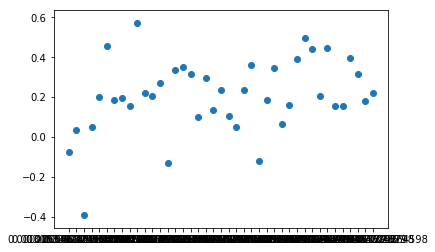

In [171]:
plt.scatter(y_test, y_pred)


# Lasso